In [1]:
import os 
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf          

## Colocar la direccion de la carpeta de iamgenes originales
path_o= '/home/fer/MATLAB_1/DenoisingNetwork/originals/'
path_r = 

def main():                                                                                                             
    print('Hola Luis Fernando')                                                                                         
                                                                                                                        
def data(path_o):
    training_data = []
    for img in os.listdir(path_o):
        pic_o = cv2.imread(os.path.join(path_o,img),0)
        pic_o = cv2.resize(pic_o,(512,512))
        training_data.append([pic_o])
    training = np.array(training_data).reshape(len(os.listdir(path_o)),pic_o.shape[0],pic_o.shape[1])
    return training, training
                                                                                                                      
def show_figure(x_test):  
    ## Generar una figura vacia
    fig, axs = plt.subplots(1, 5)                                                                                                                                                                              
    plt.gray()                                                                                                          
    a=0                                                                                                                 
                                                                                                 
    for j in range(5):    
        ## Graficar en cada posicon del subplot
        axs[j].imshow(tf.squeeze(x_test[a]))                                                                                                                                              
        a = a+1  
            
def show_one(x_test,i):
    ## Funcion para verificar solo una Imagen
    fig, axs = plt.subplots(1, 1)  
    fig.tight_layout(pad=-1)                                                                                            
    plt.gray()  
    axs.imshow(tf.squeeze(x_test[i]))  
    

def normalization(train, test):
    ## Normalizacion de los valores se colocan entre 0-1
    train_n = train.astype('float32')/255
    test_n = test.astype('float32')/255
    train_n = train_n[...,tf.newaxis]
    test_n = test_n[...,tf.newaxis]
    return train_n, test_n

def noisy(train, test, noisy_factor=0.1):
    ## Aumentor ruido artificial a las imagenes
    x_train_noisy = train + noisy_factor*tf.random.normal(shape = train.shape)
    x_test_noisy = test + noisy_factor*tf.random.normal(shape = test.shape)
    
    x_train_noisy = tf.clip_by_value(x_train_noisy, clip_value_min=0., clip_value_max=1.) 
    x_test_noisy = tf.clip_by_value(x_test_noisy, clip_value_min=0., clip_value_max=1.)
    return x_train_noisy, x_test_noisy

def plot_noisy(original, noisy,n=5):
    plt.figure(figsize=(20,8))
    plt.gray()
    
    for i in range(n):
        ax = plt.subplot(2, n , i+1)
        plt.title("Original",size=20)
        plt.imshow(tf.squeeze(original[i]))
        plt.gray()
        bx = plt.subplot(2, n, n+ i +1) 
        plt.title("original + noise", size=20) 
        plt.imshow(tf.squeeze(noisy[i])) 
    plt.show()

In [2]:
from tensorflow.keras.layers import Conv2DTranspose, Conv2D, Input

class NoiseReducer(tf.keras.Model): 
  def __init__(self):

    super(NoiseReducer, self).__init__() 

    self.encoder = tf.keras.Sequential([ 
        Input(shape=(512, 512, 1)), 
 
    Conv2D(32, (3,3), activation='relu', padding='same', strides=2),
    Conv2D(16, (3,3), activation='relu', padding='same', strides=2), 
    Conv2D(8, (3,3), activation='relu', padding='same', strides=2)]) 
    
    self.decoder = tf.keras.Sequential([ 
        Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'), 
        Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
        Conv2DTranspose(32, kernel_size=3, strides=2, activation='relu', padding='same'), 

        Conv2D(1, kernel_size=(3,3), activation='sigmoid', padding='same')]) 
  
  def call(self, x): 
    encoded = self.encoder(x) 
    decoded = self.decoder(encoded) 
    return decoded

In [3]:
x_train, x_test =data(path_o)
x_test.shape

(5, 512, 512)

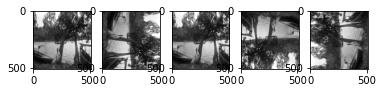

In [4]:
show_figure(x_test)

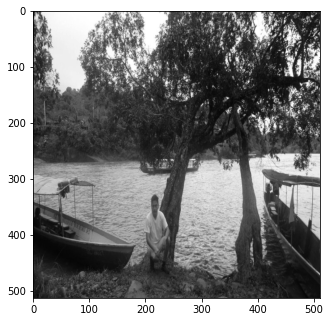

In [5]:
show_one(x_test,2)

In [6]:
x_train_n, x_test_n =normalization(x_train, x_test)

In [7]:
x_train_n.shape

(5, 512, 512, 1)

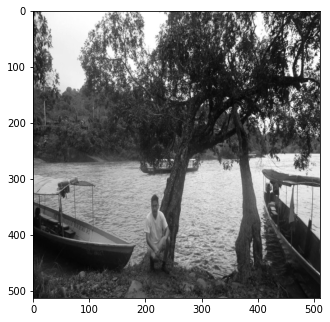

In [8]:
show_one(x_train_n,0)

In [9]:
x_train_noisy, x_test_noisy =noisy(x_train_n, x_test_n,0.4)

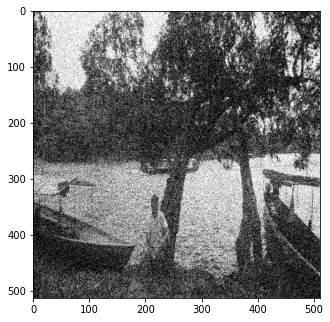

In [10]:
show_one(x_train_noisy,0)

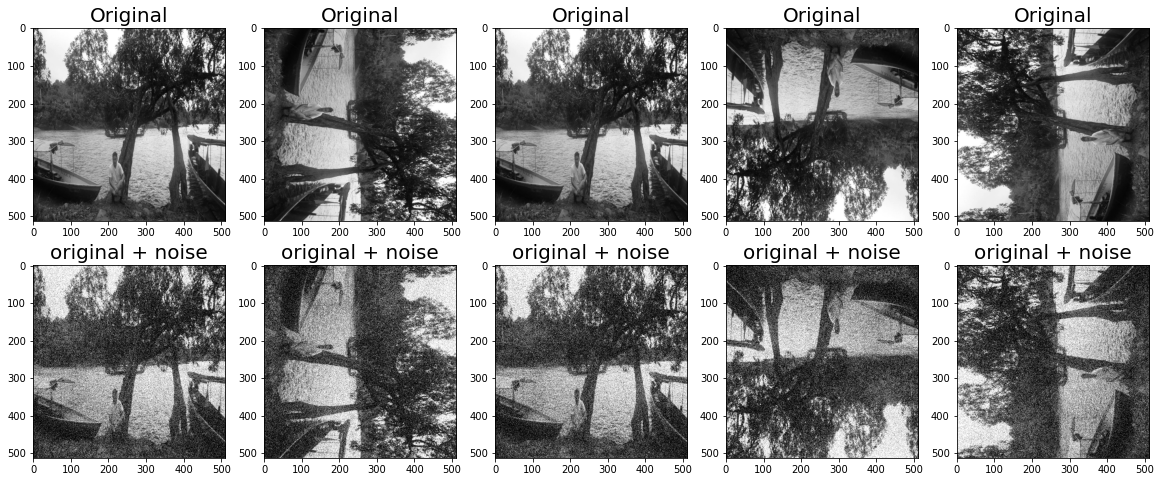

In [11]:
plot_noisy(x_train_n,x_train_noisy)

In [12]:
## Generacion de la clase de la red neuronal
autoencoder = NoiseReducer()

In [13]:
autoencoder.compile(optimizer='adam', loss='mse')

In [14]:
autoencoder.fit(x_train_noisy, 
                x_train_n, 
                epochs=600, 
                shuffle=True, 
                validation_data=(x_test_noisy, x_test_n))

Epoch 1/600
1/1 [==============================] - 3s 3s/step - loss: 0.0855 - val_loss: 0.0853
Epoch 2/600
1/1 [==============================] - 2s 2s/step - loss: 0.0853 - val_loss: 0.0850
Epoch 3/600
1/1 [==============================] - 2s 2s/step - loss: 0.0850 - val_loss: 0.0847
Epoch 4/600
1/1 [==============================] - 2s 2s/step - loss: 0.0847 - val_loss: 0.0844
Epoch 5/600
1/1 [==============================] - 2s 2s/step - loss: 0.0844 - val_loss: 0.0841
Epoch 6/600
1/1 [==============================] - 2s 2s/step - loss: 0.0841 - val_loss: 0.0837
Epoch 7/600
1/1 [==============================] - 2s 2s/step - loss: 0.0837 - val_loss: 0.0833
Epoch 8/600
1/1 [==============================] - 2s 2s/step - loss: 0.0833 - val_loss: 0.0829
Epoch 9/600
1/1 [==============================] - 2s 2s/step - loss: 0.0829 - val_loss: 0.0825
Epoch 10/600
1/1 [==============================] - 2s 2s/step - loss: 0.0825 - val_loss: 0.0819
Epoch 11/600
1/1 [=====================

1/1 [==============================] - 2s 2s/step - loss: 0.0340 - val_loss: 0.0339
Epoch 86/600
1/1 [==============================] - 2s 2s/step - loss: 0.0339 - val_loss: 0.0339
Epoch 87/600
1/1 [==============================] - 2s 2s/step - loss: 0.0339 - val_loss: 0.0338
Epoch 88/600
1/1 [==============================] - 2s 2s/step - loss: 0.0338 - val_loss: 0.0338
Epoch 89/600
1/1 [==============================] - 2s 2s/step - loss: 0.0338 - val_loss: 0.0337
Epoch 90/600
1/1 [==============================] - 2s 2s/step - loss: 0.0337 - val_loss: 0.0337
Epoch 91/600
1/1 [==============================] - 2s 2s/step - loss: 0.0337 - val_loss: 0.0336
Epoch 92/600
1/1 [==============================] - 2s 2s/step - loss: 0.0336 - val_loss: 0.0336
Epoch 93/600
1/1 [==============================] - 2s 2s/step - loss: 0.0336 - val_loss: 0.0335
Epoch 94/600
1/1 [==============================] - 2s 2s/step - loss: 0.0335 - val_loss: 0.0335
Epoch 95/600
1/1 [=========================

Epoch 169/600
1/1 [==============================] - 2s 2s/step - loss: 0.0298 - val_loss: 0.0298
Epoch 170/600
1/1 [==============================] - 2s 2s/step - loss: 0.0298 - val_loss: 0.0298
Epoch 171/600
1/1 [==============================] - 2s 2s/step - loss: 0.0297 - val_loss: 0.0297
Epoch 172/600
1/1 [==============================] - 2s 2s/step - loss: 0.0297 - val_loss: 0.0297
Epoch 173/600
1/1 [==============================] - 2s 2s/step - loss: 0.0297 - val_loss: 0.0296
Epoch 174/600
1/1 [==============================] - 2s 2s/step - loss: 0.0296 - val_loss: 0.0296
Epoch 175/600
1/1 [==============================] - 2s 2s/step - loss: 0.0296 - val_loss: 0.0295
Epoch 176/600
1/1 [==============================] - 2s 2s/step - loss: 0.0295 - val_loss: 0.0295
Epoch 177/600
1/1 [==============================] - 2s 2s/step - loss: 0.0295 - val_loss: 0.0295
Epoch 178/600
1/1 [==============================] - 2s 2s/step - loss: 0.0295 - val_loss: 0.0294
Epoch 179/600
1/1 [=

1/1 [==============================] - 2s 2s/step - loss: 0.0268 - val_loss: 0.0268
Epoch 253/600
1/1 [==============================] - 2s 2s/step - loss: 0.0267 - val_loss: 0.0267
Epoch 254/600
1/1 [==============================] - 2s 2s/step - loss: 0.0267 - val_loss: 0.0267
Epoch 255/600
1/1 [==============================] - 2s 2s/step - loss: 0.0267 - val_loss: 0.0267
Epoch 256/600
1/1 [==============================] - 2s 2s/step - loss: 0.0266 - val_loss: 0.0266
Epoch 257/600
1/1 [==============================] - 2s 2s/step - loss: 0.0266 - val_loss: 0.0266
Epoch 258/600
1/1 [==============================] - 2s 2s/step - loss: 0.0266 - val_loss: 0.0266
Epoch 259/600
1/1 [==============================] - 2s 2s/step - loss: 0.0265 - val_loss: 0.0265
Epoch 260/600
1/1 [==============================] - 2s 2s/step - loss: 0.0265 - val_loss: 0.0265
Epoch 261/600
1/1 [==============================] - 2s 2s/step - loss: 0.0265 - val_loss: 0.0265
Epoch 262/600
1/1 [===============

1/1 [==============================] - 2s 2s/step - loss: 0.0133 - val_loss: 0.0132
Epoch 336/600
1/1 [==============================] - 2s 2s/step - loss: 0.0131 - val_loss: 0.0130
Epoch 337/600
1/1 [==============================] - 2s 2s/step - loss: 0.0131 - val_loss: 0.0126
Epoch 338/600
1/1 [==============================] - 2s 2s/step - loss: 0.0126 - val_loss: 0.0122
Epoch 339/600
1/1 [==============================] - 2s 2s/step - loss: 0.0122 - val_loss: 0.0121
Epoch 340/600
1/1 [==============================] - 2s 2s/step - loss: 0.0122 - val_loss: 0.0123
Epoch 341/600
1/1 [==============================] - 2s 2s/step - loss: 0.0122 - val_loss: 0.0124
Epoch 342/600
1/1 [==============================] - 2s 2s/step - loss: 0.0124 - val_loss: 0.0122
Epoch 343/600
1/1 [==============================] - 2s 2s/step - loss: 0.0122 - val_loss: 0.0119
Epoch 344/600
1/1 [==============================] - 2s 2s/step - loss: 0.0120 - val_loss: 0.0115
Epoch 345/600
1/1 [===============

1/1 [==============================] - 2s 2s/step - loss: 0.0089 - val_loss: 0.0090
Epoch 419/600
1/1 [==============================] - 2s 2s/step - loss: 0.0091 - val_loss: 0.0091
Epoch 420/600
1/1 [==============================] - 2s 2s/step - loss: 0.0091 - val_loss: 0.0090
Epoch 421/600
1/1 [==============================] - 2s 2s/step - loss: 0.0090 - val_loss: 0.0089
Epoch 422/600
1/1 [==============================] - 2s 2s/step - loss: 0.0089 - val_loss: 0.0088
Epoch 423/600
1/1 [==============================] - 2s 2s/step - loss: 0.0088 - val_loss: 0.0089
Epoch 424/600
1/1 [==============================] - 2s 2s/step - loss: 0.0089 - val_loss: 0.0089
Epoch 425/600
1/1 [==============================] - 2s 2s/step - loss: 0.0089 - val_loss: 0.0089
Epoch 426/600
1/1 [==============================] - 2s 2s/step - loss: 0.0089 - val_loss: 0.0089
Epoch 427/600
1/1 [==============================] - 2s 2s/step - loss: 0.0089 - val_loss: 0.0088
Epoch 428/600
1/1 [===============

1/1 [==============================] - 2s 2s/step - loss: 0.0086 - val_loss: 0.0085
Epoch 502/600
1/1 [==============================] - 2s 2s/step - loss: 0.0085 - val_loss: 0.0085
Epoch 503/600
1/1 [==============================] - 2s 2s/step - loss: 0.0084 - val_loss: 0.0085
Epoch 504/600
1/1 [==============================] - 2s 2s/step - loss: 0.0085 - val_loss: 0.0086
Epoch 505/600
1/1 [==============================] - 2s 2s/step - loss: 0.0086 - val_loss: 0.0086
Epoch 506/600
1/1 [==============================] - 2s 2s/step - loss: 0.0086 - val_loss: 0.0086
Epoch 507/600
1/1 [==============================] - 3s 3s/step - loss: 0.0085 - val_loss: 0.0085
Epoch 508/600
1/1 [==============================] - 2s 2s/step - loss: 0.0085 - val_loss: 0.0084
Epoch 509/600
1/1 [==============================] - 2s 2s/step - loss: 0.0084 - val_loss: 0.0085
Epoch 510/600
1/1 [==============================] - 2s 2s/step - loss: 0.0084 - val_loss: 0.0085
Epoch 511/600
1/1 [===============

1/1 [==============================] - 2s 2s/step - loss: 0.0082 - val_loss: 0.0083
Epoch 585/600
1/1 [==============================] - 2s 2s/step - loss: 0.0083 - val_loss: 0.0083
Epoch 586/600
1/1 [==============================] - 2s 2s/step - loss: 0.0083 - val_loss: 0.0083
Epoch 587/600
1/1 [==============================] - 2s 2s/step - loss: 0.0083 - val_loss: 0.0083
Epoch 588/600
1/1 [==============================] - 2s 2s/step - loss: 0.0082 - val_loss: 0.0082
Epoch 589/600
1/1 [==============================] - 2s 2s/step - loss: 0.0082 - val_loss: 0.0082
Epoch 590/600
1/1 [==============================] - 2s 2s/step - loss: 0.0082 - val_loss: 0.0083
Epoch 591/600
1/1 [==============================] - 2s 2s/step - loss: 0.0083 - val_loss: 0.0083
Epoch 592/600
1/1 [==============================] - 2s 2s/step - loss: 0.0083 - val_loss: 0.0082
Epoch 593/600
1/1 [==============================] - 2s 2s/step - loss: 0.0082 - val_loss: 0.0082
Epoch 594/600
1/1 [===============

In [15]:
encoded_imgs=autoencoder.encoder(x_test_noisy).numpy()
decoded_imgs=autoencoder.decoder(encoded_imgs)
decoded_imgs.shape

TensorShape([5, 512, 512, 1])

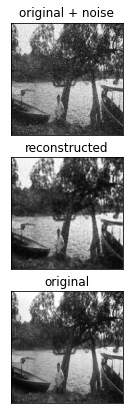

In [16]:

n = 1
plt.figure(figsize=(20, 7))
plt.gray()
for i in range(n): 
  # display original + noise 
    bx = plt.subplot(3, n, i + 1) 
    plt.title("original + noise") 
    plt.imshow(tf.squeeze(x_test_noisy[i])) 
    bx.get_xaxis().set_visible(False) 
    bx.get_yaxis().set_visible(False) 

    # display reconstruction 
    cx = plt.subplot(3, n, i + n + 1) 
    plt.title("reconstructed") 
    plt.imshow(tf.squeeze(decoded_imgs[i])) 
    cx.get_xaxis().set_visible(False) 
    cx.get_yaxis().set_visible(False) 

    # display original 
    ax = plt.subplot(3, n, i + 2*n + 1) 
    plt.title("original") 
    plt.imshow(tf.squeeze(x_test[i])) 
    ax.get_xaxis().set_visible(False) 
    ax.get_yaxis().set_visible(False) 

plt.show()

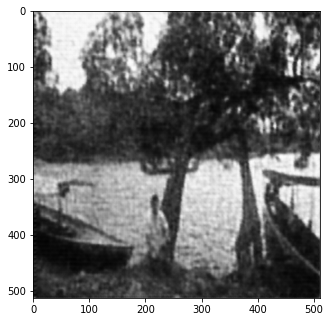

In [25]:
show_one(decoded_imgs,0)

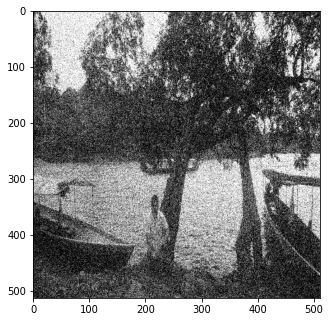

In [27]:
show_one(x_test_noisy,0)

In [17]:
2**2

4

In [18]:
2**3

8

In [19]:
2**4

16

In [20]:
2**5

32

In [21]:
2**6

64

In [22]:
2**7

128

In [23]:
2**8

256

In [24]:
2**9

512